In [190]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt



from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression


In [87]:
telco_raw = pd.read_csv("../KPIs_and_Exploratory/data/telco.csv")
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Print the number of unique values in each telco_raw column
print(telco_raw.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [89]:
# Change dtype 
telco_raw['SeniorCitizen'] = telco_raw['SeniorCitizen'].astype(str)

telco_raw['TotalCharges']  = pd.to_numeric(telco_raw['TotalCharges'] ,errors='coerce')

    


In [90]:
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [91]:
# Store customerID and Churn column names
custid = ['customerID']
target = ['Churn']

num_attributes = telco_raw.drop(columns=['customerID','Churn' ]).select_dtypes( include=['int64', 'float64'] ).columns


categorical = telco_raw.drop(columns=['customerID','Churn' ]).select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ).columns

In [92]:
# Perform one-hot encoding to categorical variables 
telco_raw = pd.get_dummies(data = telco_raw, columns = categorical, drop_first=True)

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[num_attributes])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=num_attributes)
scaled_numerical

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457
...,...,...,...
7038,-0.340876,0.665992,-0.129180
7039,1.613701,1.277533,2.241056
7040,-0.870241,-1.168632,-0.854514
7041,-1.155283,0.320338,-0.872095


In [93]:
teco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
# Drop non-scaled numerical columns
telco_raw = telco_raw.drop(columns=num_attributes.values.tolist(), axis=1)


# Merge the non-numerical with the scaled numerical data
telco = telco_raw.merge(right=scaled_numerical,how='left',left_index=True,right_index=True)
telco.head()

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.277445,-1.160323,-0.994194
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.173740
2,3668-QPYBK,Yes,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.236724,-0.362660,-0.959649
3,7795-CFOCW,No,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0.514251,-0.746535,-0.195248
4,9237-HQITU,Yes,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,-1.236724,0.197365,-0.940457


In [119]:
telco.isna().sum()

customerID                                0
Churn                                     0
gender_Male                               0
SeniorCitizen_1                           0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes             

In [120]:
telco.dropna(inplace=True)

In [149]:
telco['Churn'] = telco['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [150]:
Y = telco[target[0]]
X = telco.drop(columns=[target[0], custid[0]],axis=1)

- Accuracy - The % of correctly predicted labels (both Churn and non Churn)
- Precision - The % of total model's positive class predictions (here - predicted as Churn) that
were correctly classied
- Recall - The % of total positive class samples (all churned customers) that were correctly
classied

In [152]:


# Split X and Y into training and testing datasets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

# Ensure training dataset has only 75% of original X data
print(train_X.shape[0] / X.shape[0])

# Ensure testing dataset has only 25% of original X data
print(test_X.shape[0] / Y.shape[0])

0.75
0.25


In [178]:
# Initialize the Decision Tree
clf = tree.DecisionTreeClassifier(max_depth = 6, 
               criterion = 'gini', 
               splitter  = 'best')

# Fit the model to the training data
clf = clf.fit(train_X, train_Y)

# Predict the values on test dataset
pred_Y = clf.predict(test_X)

# Print accuracy values
print("Training accuracy: ", np.round(clf.score(train_X, train_Y), 3)) 
print("Test accuracy: ", np.round(accuracy_score(test_Y, pred_Y), 3))

Training accuracy:  0.804
Test accuracy:  0.777


In [180]:
depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
depth_tuning = np.zeros((len(depth_list), 2))
depth_tuning[:,0] = depth_list



# Run a for loop over the range of depth list length
for index in range(0, len(depth_list)):
  # Initialize and fit decision tree with the `max_depth` candidate
  mytree = tree.DecisionTreeClassifier(max_depth =depth_list[index])
  mytree.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = mytree.predict(test_X)
  # Calculate the recall score 
    
  depth_tuning[index,1] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['Max_Depth','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth    Recall
0         2.0  0.402923
1         3.0  0.402923
2         4.0  0.507307
3         5.0  0.409186
4         6.0  0.553236
5         7.0  0.505219
6         8.0  0.526096
7         9.0  0.486430
8        10.0  0.486430
9        11.0  0.507307
10       12.0  0.532359
11       13.0  0.519833
12       14.0  0.536534


In [126]:
# Logistic Regrassion
# initizalize instance
logreg = LogisticRegression()

# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7992


In [181]:
# logistic regression with L1 regularization
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C =0.025, solver='liblinear')

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.7895


In [201]:
yhat_lr = logreg.predict_proba( test_X )


In [204]:
print('Balanced Accuracy: '   + str(balanced_accuracy_score(test_Y, pred_test_Y )))
print("ROC AUC score : ", roc_auc_score(test_Y, pred_test_Y))

Balanced Accuracy: 0.6986571254617304
ROC AUC score :  0.6986571254617304


- The cumulative gains curve helps to identify the percentage of a category/class that appears within a percentage of the sample population for a particular model. 
- The lift curve is used to determine the effectiveness of a binary classifier,  opposed to when you are not using one

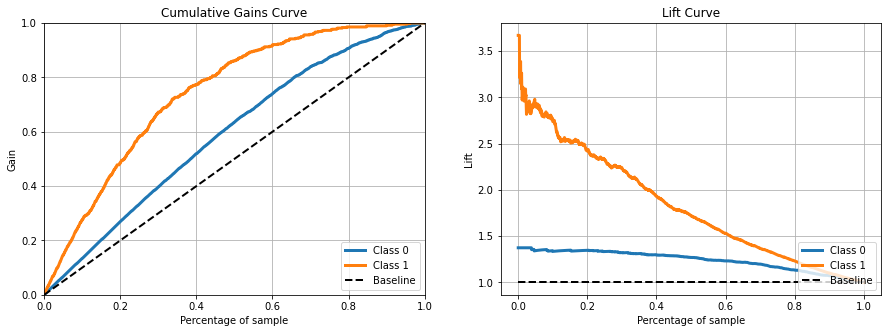

In [195]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,5))
skplt.metrics.plot_cumulative_gain(test_Y, yhat_lr, ax=axs[0])
skplt.metrics.plot_lift_curve(test_Y, yhat_lr,ax=axs[1]);

In [182]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients  to make them more interpretable
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

                           Feature  Coefficient  Exp_Coefficient
27                          tenure    -0.890074         0.410625
4                 PhoneService_Yes    -0.835133         0.433817
22               Contract_Two year    -0.677895         0.507685
10              OnlineSecurity_Yes    -0.455926         0.633861
16                 TechSupport_Yes    -0.375980         0.686616
21               Contract_One year    -0.310435         0.733128
3                   Dependents_Yes    -0.118414         0.888328
12                OnlineBackup_Yes    -0.089004         0.914842
14            DeviceProtection_Yes    -0.062422         0.939486
1                  SeniorCitizen_1     0.046712         1.047820
23            PaperlessBilling_Yes     0.055196         1.056748
25  PaymentMethod_Electronic check     0.241672         1.273376
28                  MonthlyCharges     0.910317         2.485111


- interpretation: 
    - the feature with the largest effect n the odds of churning is tenure.
    - Values less than 1 decrease the odds and values more than 1 increases the odds. 
    - So, for each additional year of tenure, the odds for churning decreases by 1.41 or roughly 60% drecrease in the churn odds

In [167]:


# Run a for loop over the range of C list length

C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C

for index in range(0, len(C)):
  # Initialize and fit Logistic Regression with the C candidate
  logreg =  LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
  logreg.fit(train_X, train_Y)
  # Predict churn on the testing data
  pred_test_Y = logreg.predict(test_X)
  # Create non-zero count and recall score columns
  l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
  l1_metrics[index,2] = accuracy_score(test_Y, pred_test_Y)
  l1_metrics[index,3] = precision_score(test_Y, pred_test_Y)
  l1_metrics[index,4] = recall_score(test_Y, pred_test_Y)

    

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
c_tunned = pd.DataFrame(l1_metrics, columns= col_names)
c_tunned

,C,Non-Zero Coeffs,Accuracy,Precision,Recall
0,1.0000,29.0,0.798635,0.653563,0.555324
1,0.5000,22.0,0.798635,0.652812,0.557411
2,0.2500,21.0,0.798066,0.651220,0.557411
3,0.1000,20.0,0.797497,0.652605,0.549061
4,0.0500,15.0,0.795222,0.652174,0.532359
5,0.0250,13.0,0.789534,0.647696,0.498956
6,0.0100,7.0,0.784414,0.657233,0.436326
7,0.0050,3.0,0.784983,0.716738,0.348643
8,0.0025,2.0,0.729238,0.800000,0.008351


In [161]:
max(c_tunned.Accuracy)

0.7986348122866894

In [175]:
c_tunned.style.highlight_max(subset=['Accuracy','Precision', 'Recall'],color = 'lightgreen')

,C,Non-Zero Coeffs,Accuracy,Precision,Recall
0,1.000000,29.000000,0.798635,0.653563,0.555324
1,0.500000,22.000000,0.798635,0.652812,0.557411
2,0.250000,21.000000,0.798066,0.651220,0.557411
3,0.100000,20.000000,0.797497,0.652605,0.549061
4,0.050000,15.000000,0.795222,0.652174,0.532359
5,0.025000,13.000000,0.789534,0.647696,0.498956
6,0.010000,7.000000,0.784414,0.657233,0.436326
7,0.005000,3.000000,0.784983,0.716738,0.348643
8,0.002500,2.000000,0.729238,0.800000,0.008351
